# Linear Regression days left vs price and  duration vs price

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Clean_Dataset.csv', index_col = 0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [20]:
df['airline'].astype('category')
df.dtypes

airline               int64
flight               object
source_city           int64
departure_time        int64
stops                object
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

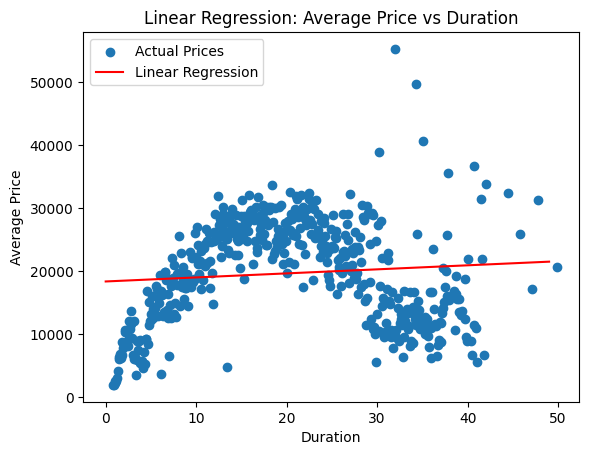

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('../data/Clean_Dataset.csv', index_col=0)

# Group by duration and calculate average price
duration_avg_price = df.groupby('duration')['price'].mean().reset_index()

# Separate features (X) and target variable (y)
X_duration = duration_avg_price[['duration']]
y_duration = duration_avg_price['price']

# Create a linear regression model
model_duration = LinearRegression()

# Train the model
model_duration.fit(X_duration, y_duration)

# Make predictions for the entire range of durations
duration_range = pd.DataFrame({'duration': range(int(df['duration'].min()), int(df['duration'].max())+1)})
predicted_prices_duration = model_duration.predict(duration_range)

# Plot the results
plt.scatter(duration_avg_price['duration'], duration_avg_price['price'], label='Actual Prices')
plt.plot(duration_range['duration'], predicted_prices_duration, color='red', label='Linear Regression')
plt.xlabel("Duration")
plt.ylabel("Average Price")
plt.title("Linear Regression: Average Price vs Duration")
plt.legend()
plt.show()


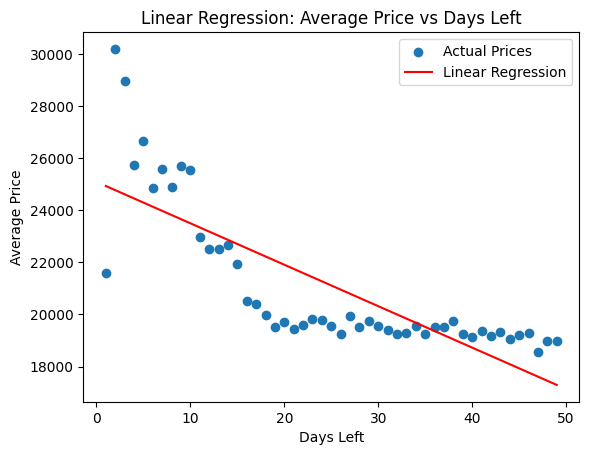

In [25]:
# Group by days_left and calculate average price
days_left_avg_price = df.groupby('days_left')['price'].mean().reset_index()

# Separate features (X) and target variable (y)
X_days_left = days_left_avg_price[['days_left']]
y_days_left = days_left_avg_price['price']

# Create a linear regression model
model_days_left = LinearRegression()

# Train the model
model_days_left.fit(X_days_left, y_days_left)

# Make predictions for the entire range of days_left
days_left_range = pd.DataFrame({'days_left': range(int(df['days_left'].min()), int(df['days_left'].max())+1)})
predicted_prices_days_left = model_days_left.predict(days_left_range)

# Plot the results
plt.scatter(days_left_avg_price['days_left'], days_left_avg_price['price'], label='Actual Prices')
plt.plot(days_left_range['days_left'], predicted_prices_days_left, color='red', label='Linear Regression')
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.title("Linear Regression: Average Price vs Days Left")
plt.legend()
plt.show()